## First Look to Data

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
planets = sns.load_dataset('planets')
df = planets.copy()
df.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [3]:
df.describe().T

count         mean           std          min         25%  \
number          1035.0     1.785507      1.240976     1.000000     1.00000   
orbital_period   992.0  2002.917596  26014.728304     0.090706     5.44254   
mass             513.0     2.638161      3.818617     0.003600     0.22900   
distance         808.0   264.069282    733.116493     1.350000    32.56000   
year            1035.0  2009.070531      3.972567  1989.000000  2007.00000   

                      50%       75%       max  
number             1.0000     2.000       7.0  
orbital_period    39.9795   526.005  730000.0  
mass               1.2600     3.040      25.0  
distance          55.2500   178.500    8500.0  
year            2010.0000  2012.000    2014.0

In [4]:
df.method = pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [5]:
df.tail(3)

method  number  orbital_period  mass  distance  year
1032  Transit       1        3.191524   NaN     174.0  2007
1033  Transit       1        4.125083   NaN     293.0  2008
1034  Transit       1        4.187757   NaN     260.0  2008

In [6]:
df.shape

(1035, 6)

In [7]:
df.nunique()

method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [10]:
df[['orbital_period','mass','distance']].fillna(0, inplace=True)

C:\Users\berka\Anaconda3\lib\site-packages\pandas\core\frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [11]:
df['orbital_period'].fillna(np.mean(df.mass), inplace=True)
# It's just simple method for NaN values, if you dont want spend much time, you can do it but It's not totally true method, you should detailed analyse

In [12]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

## Categorical Variable Summary

In [15]:
cat_df = df.select_dtypes(include = ['category'])
cat_df

method
0     Radial Velocity
1     Radial Velocity
2     Radial Velocity
3     Radial Velocity
4     Radial Velocity
...               ...
1030          Transit
1031          Transit
1032          Transit
1033          Transit
1034          Transit

[1035 rows x 1 columns]

In [19]:
cat_df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

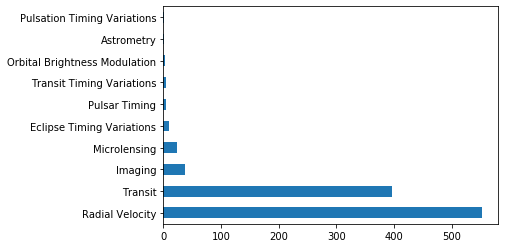

In [27]:
df['method'].value_counts().plot.barh()
plt.show()

In [28]:
from pandas.api.types import CategoricalDtype

In [29]:
cat_df = cat_df.astype(CategoricalDtype(ordered = True))
cat_df.method.head()

0    Radial Velocity
1    Radial Velocity
2    Radial Velocity
3    Radial Velocity
4    Radial Velocity
Name: method, dtype: category
Categories (10, object): [Astrometry < Eclipse Timing Variations < Imaging < Microlensing ... Pulsation Timing Variations < Radial Velocity < Transit < Transit Timing Variations]

## Constant Variable Summary

In [30]:
df.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

In [31]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

number  orbital_period   mass  distance  year
0       1         269.300   7.10     77.40  2006
1       1         874.774   2.21     56.95  2008
2       1         763.000   2.60     19.84  2011
3       1         326.030  19.40    110.62  2007
4       1         516.220  10.50    119.47  2009

In [32]:
df_num.describe().T

count         mean           std          min         25%  \
number          1035.0     1.785507      1.240976     1.000000     1.00000   
orbital_period   992.0  2002.917596  26014.728304     0.090706     5.44254   
mass             513.0     2.638161      3.818617     0.003600     0.22900   
distance         808.0   264.069282    733.116493     1.350000    32.56000   
year            1035.0  2009.070531      3.972567  1989.000000  2007.00000   

                      50%       75%       max  
number             1.0000     2.000       7.0  
orbital_period    39.9795   526.005  730000.0  
mass               1.2600     3.040      25.0  
distance          55.2500   178.500    8500.0  
year            2010.0000  2012.000    2014.0

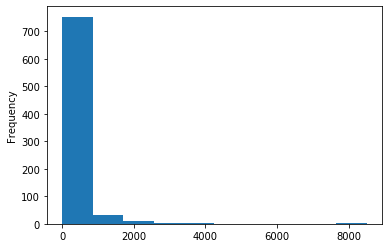

In [45]:
df['distance'].plot.hist(bins = 10)
plt.show()